In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#한글설정
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore')

In [21]:
df = pd.read_csv('df_std.csv',encoding='euc-kr')
df_based=df.copy()
# gid remove
df.drop(columns=['gid','cctv'],inplace=True)
df.head()

,pa,ep,fp,yp,light,nb
0,0.757896,0.238218,0.178516,0.0,0.592419,0.250172
1,0.749224,0.000000,0.000000,0.0,0.735251,0.250172
2,0.749224,0.000000,0.000000,0.0,0.655714,0.250172
3,0.749224,0.000000,0.000000,0.0,0.628545,0.320499
4,0.727538,0.000000,0.000000,0.0,0.539505,0.363463


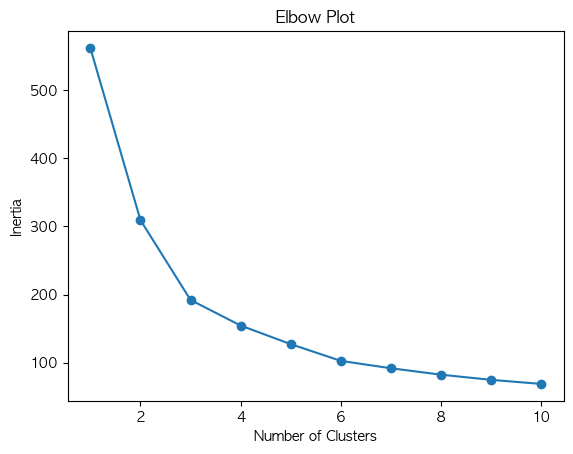

In [16]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score 
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(312)  # 랜덤 시드를 312로 설정

# 데이터 준비
X = df

# 최대 클러스터 개수 설정
max_clusters = 10

# K-means 모델 생성 및 엘보우 메서드 수행
inertias = []
for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# 엘보우 플롯 그리기
plt.plot(range(1, max_clusters+1), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

관성(Inertia)은 K-means 군집화에서 사용되는 측정 지표로, 각 데이터 포인트와 해당 클러스터 중심점 간의 거리의 합입니다. 간단히 말해, 관성은 클러스터 내의 데이터들이 얼마나 중심에 가깝게 모여있는지를 나타내는 값입니다.

K-means 알고리즘은 관성을 최소화하는 방향으로 클러스터 중심점을 업데이트하며 군집화를 수행합니다. 따라서 관성이 작을수록 각 클러스터 내의 데이터들이 중심에 모여있고, 클러스터 간의 분리도가 높아집니다.

엘보우 플롯을 통해 관성의 변화를 확인하는 것은 최적 클러스터 개수를 결정하는 데 도움이 됩니다. 관성이 급격히 감소하는 지점, 즉 그래프에서 "팔꿈치" 모양이 나타나는 부분이 최적 클러스터 개수라고 간주될 수 있습니다.

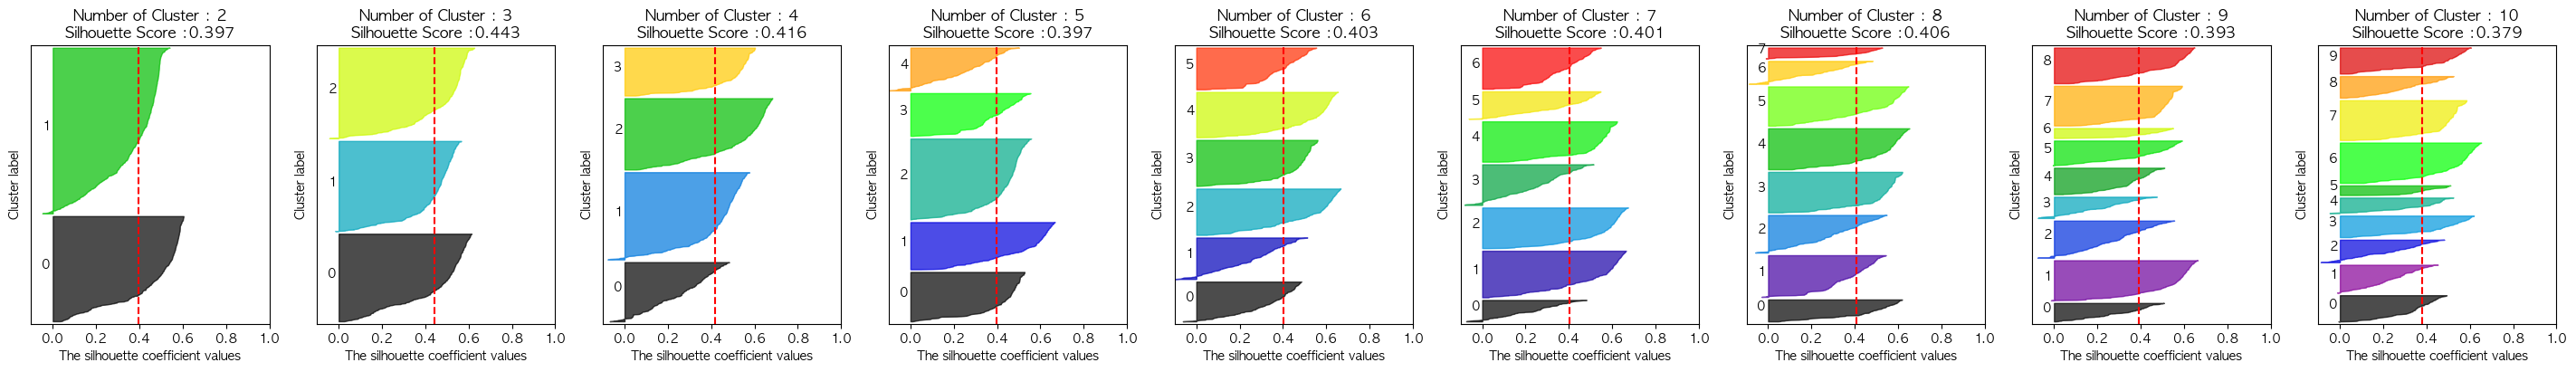

In [39]:
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
def visualize_silhouette(cluster_lists, X_features):     
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=1000, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

visualize_silhouette([2, 3, 4, 5, 6, 7, 8, 9, 10], df)

In [18]:
# K-means 모델 생성
kmeans = KMeans(n_clusters=4)

# 군집화 수행
kmeans.fit(X)

# 군집 할당 결과 저장
labels = kmeans.labels_
df_mean = df.copy()

df_mean['label'] = labels
df_mean['gid'] = df_based['gid']
df_mean.head()

,pa,ep,fp,yp,light,nb,label,gid
0,0.757896,0.238218,0.178516,0.0,0.592419,0.250172,3,ㅼ궗58ab30ba
1,0.749224,0.000000,0.000000,0.0,0.735251,0.250172,3,ㅼ궗58bb30ab
2,0.749224,0.000000,0.000000,0.0,0.655714,0.250172,3,ㅼ궗59aa30aa
3,0.749224,0.000000,0.000000,0.0,0.628545,0.320499,3,ㅼ궗59aa30ab
4,0.727538,0.000000,0.000000,0.0,0.539505,0.363463,3,ㅼ궗59ab30aa


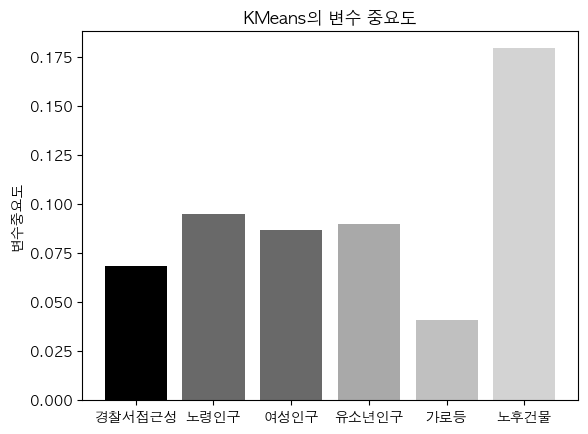

In [36]:
X = df

# K-means 알고리즘 적용
kmeans = KMeans(n_clusters=4, random_state=312)
kmeans.fit(X)
labels = kmeans.labels_

# 변수 중요도 계산
variances = np.zeros(df.shape[1])
for i in range(df.shape[1]):
    variances[i] = np.var(df.iloc[labels == 0, i]) + np.var(df.iloc[labels == 1, i]) + np.var(df.iloc[labels == 2, i]) + np.var(df.iloc[labels == 3, i])
colors = ['black','dimgray','dimgrey','darkgray','silver','lightgrey']
aa = ['경찰서접근성','노령인구', '여성인구','유소년인구','가로등','노후건물']
# 변수 중요도 시각화
plt.bar(aa, variances,color=colors)
# plt.xticks(rotation=45)
# plt.xlabel('Variables')
plt.ylabel('변수중요도')
plt.title('KMeans의 변수 중요도')
plt.show()

In [33]:
variances

array([0.06854834, 0.09493135, 0.08659651, 0.08959148, 0.04110316,
       0.17927828])

In [19]:
df_mean.to_csv('kmeans_data_con4_2.csv',encoding='euc-kr',index=False)

In [35]:
unique_labels, label_counts = np.unique(labels, return_counts=True)

# 각 군집의 데이터 포인트 수 출력
for label, count in zip(unique_labels, label_counts):
    print(f"Cluster {label}: {count} data points")

Cluster 0: 193 data points
Cluster 1: 341 data points
Cluster 2: 195 data points
Cluster 3: 352 data points


In [36]:
X=df
# K-means 모델 생성
kmeans = KMeans(n_clusters=5)

# 군집화 수행
kmeans.fit(X)

# 군집 할당 결과 저장
labels = kmeans.labels_
df_mean = df.copy()

df_mean['label'] = labels
df_mean['gid'] = df_based['gid']
df_mean.head()

,ep,fp,yp,nb,label,gid
0,0.238218,0.178516,0.0,0.250172,1,ㅼ궗58ab30ba
1,0.000000,0.000000,0.0,0.250172,4,ㅼ궗58bb30ab
2,0.000000,0.000000,0.0,0.250172,4,ㅼ궗59aa30aa
3,0.000000,0.000000,0.0,0.320499,4,ㅼ궗59aa30ab
4,0.000000,0.000000,0.0,0.363463,4,ㅼ궗59ab30aa


In [27]:
unique_labels, label_counts = np.unique(labels, return_counts=True)

# 각 군집의 데이터 포인트 수 출력
for label, count in zip(unique_labels, label_counts):
    print(f"Cluster {label}: {count} data points")

Cluster 0: 169 data points
Cluster 1: 320 data points
Cluster 2: 195 data points
Cluster 3: 207 data points
Cluster 4: 190 data points


In [37]:
df_mean.to_csv('kmeans_data_con5_2.csv',encoding='euc-kr',index=False)